*Арешин Станислав Олегович М80-404Б-17*

**Лабораторная работа по многомерной статистике**

# Подготовка датафрейма
Dataset of someone telecom operators
https://www.kaggle.com/ivanhrek/telecom-churn

Прогнозируемая велечина - отток (столбец churn).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# загрузка датафрейма
df = pd.read_csv('./telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# удалим столбцы, которые не влияют на эту величину с точки зрения здравого смысла
# вряд ли стобец phone number может нам что-то сказать о величине оттока, дропнем его

df = df.drop(['phone number'], axis = 1)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# общая информация о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

churn
False    2850
True      483
Name: churn, dtype: int64
Процент данных показывающих целевую группу "отток": 14.0%


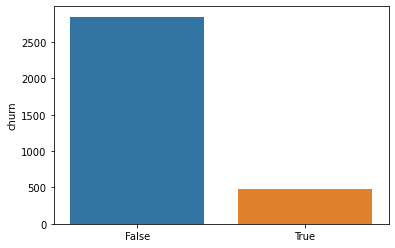

In [5]:
# баланс целевой величины

balance = df.groupby('churn')['churn'].count()
print(balance)
print(f'Процент данных показывающих целевую группу "отток": {np.round(balance[1]/len(df) * 100) }%')
sns.barplot(x = [False, True], y = balance)

In [6]:
# посмотрим на описательную статистику датафрейма по количественным признакам признакам

df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
# закодируем категориальные признаки
from sklearn import preprocessing

def number_encode_features(init_df):
    result = init_df.copy() 
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder() 
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders


encoded_data, encoders = number_encode_features(df)
encoded_data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
# переведём стобец churn в числовой формат, запишем его в отдельную переменную
y = np.array([1 if i == True else 0 for i in encoded_data['churn']]) # ответы
y

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
# разделим целевую величину и выборку
encoded_data = encoded_data.drop(['churn'], axis= 1)
print('Ответы\n', y)
print('Обучающая выборка')
encoded_data.head()

Ответы
 [0 0 0 ... 0 0 0]
Обучающая выборка


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


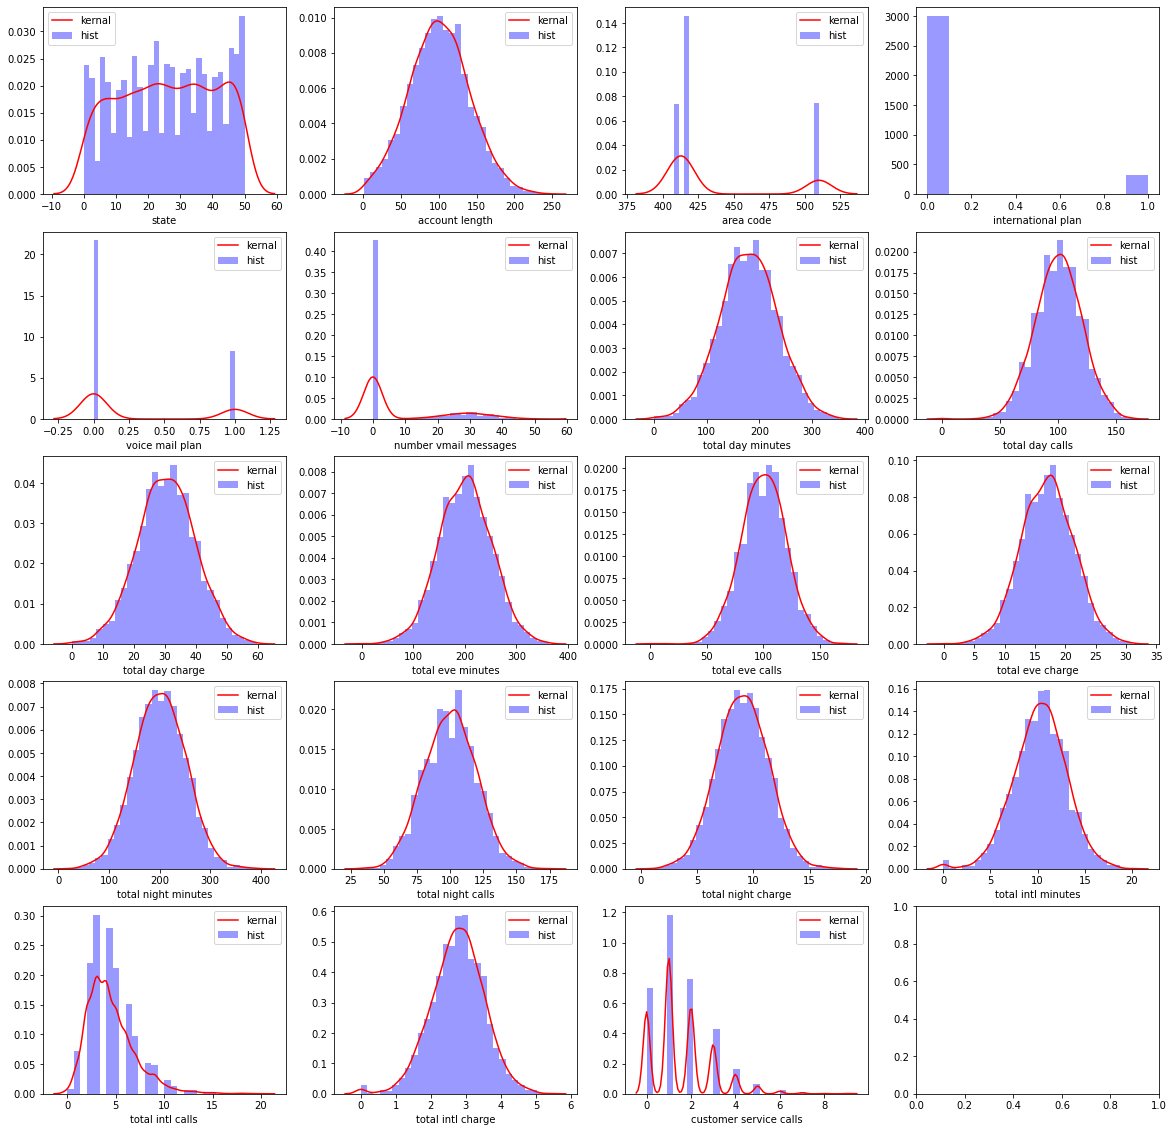

In [11]:
# посмотрим на распределения величин по признакам с помощью гистограмм и kde

l = [i for i in encoded_data.columns]
fig, axes = plt.subplots(5,4, figsize=(20, 20))
r = 0
c = 0
for i in range(len(l)):
    if i in [3]:
        sns.distplot(encoded_data[l[i]],bins = 10, kde=False,hist_kws={'color':'blue','label':'hist'}, ax=axes[r, c])
        c += 1
    else:
        ax = sns.distplot(encoded_data[l[i]],bins = 30, kde_kws={'color':'red','label':'kernal'}, 
            hist_kws={'color':'blue','label':'hist'}, ax=axes[r, c])
        c+=1
    if c == 4:
        c = 0
        r += 1

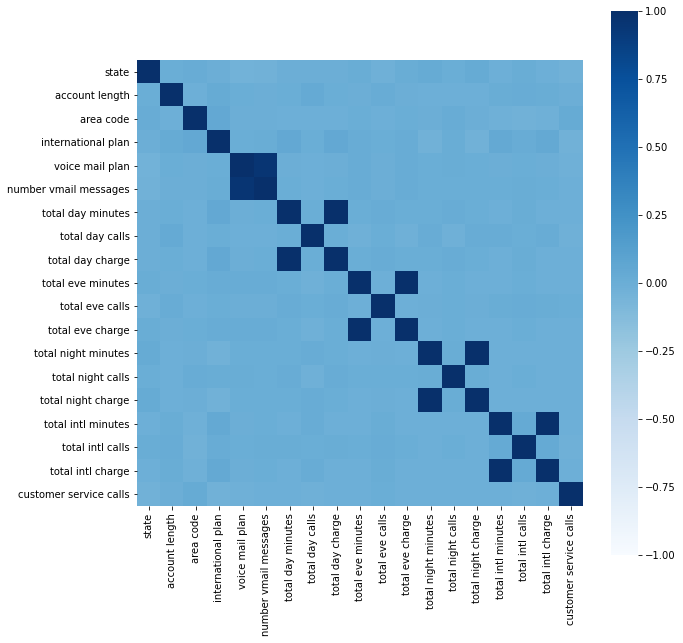

In [12]:
# построим матрицу корреляций
plt.subplots(figsize=(10,10))
sns.heatmap(encoded_data.corr(), vmin=-1, cmap='Blues', square=True)
plt.show()

In [13]:
# сбалансируем данные

from sklearn.utils import shuffle

# cоздадим обучающую выборку Х, перевдем получанные цифровые данные в np.array
X = np.array(encoded_data, float)
# сбалансируем данные
not_churn_ids = np.argwhere(y == 0).flatten()

not_churn_ids = shuffle(not_churn_ids, random_state = 42)
# найдем "лишних", для этого обрежем найденные id на кол-во ушедших (внутри len)
not_churn_ids = not_churn_ids[len(np.argwhere(y == 1).flatten()):]

# np.delete принимает массив, индексы, которые выбросить и по какой оси выкидывать
X = np.delete(X, not_churn_ids, 0)
y = np.delete(y, not_churn_ids, 0)

pd.Series(y).value_counts()

1    483
0    483
dtype: int64

In [14]:
X.shape, y.shape

((966, 19), (966,))

Подготовка датафрейма закончена

# Kmeans clustering

## Реализация алгоритма

In [101]:
from scipy.spatial import distance

class KMeans:
    def __init__(self, n_clusters =2, dist = distance.euclidean,  eps = 0.001, max_iter = 100):
        self.n_clusters = n_clusters
        self.eps = eps
        self.max_iter = max_iter
        self.dist = dist

    def fit(self, data):
        self.centroids = {}
        # инициализируем стартовые центроиды
        for i in range(self.n_clusters):
            #n = np.random.choice(len(data))
            self.centroids[i] = data[i]
        
        for i in range(self.max_iter):
            self.classes = {}
            self.res = []
            self.inertia = 0
            
            for i in range(self.n_clusters):
                self.classes[i] = []

            # находим расстояние между элементом и центроидом, выбираем самый близкий центроид
            for elem in data:
                distances = [self.dist(elem, self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(elem)
                self.res.append(classification)
                #self.inertia += min(distances)
                self.inertia += min([distance.euclidean(elem, self.centroids[centroid]) for centroid in self.centroids])
                
            previous = dict(self.centroids)

            # пересчитываем центроиды
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)
                
            stop = True
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid) / original_centroid * 100.0) > self.eps:
                    stop = False
            # если центроиды не сдвинулись - останавливаемся        
            if stop:
                break

    def pred(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

## Выбор количества кластеров

D:\conda\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide


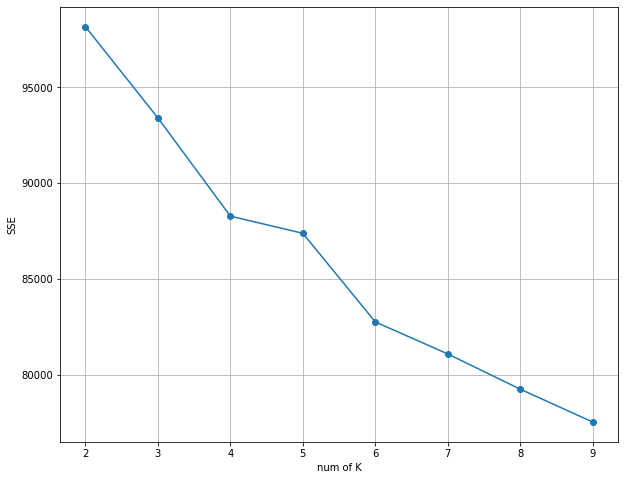

In [102]:
Ks = range(2, 10)
res = []
for k in Ks:   
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    res.append(kmeans.inertia)

plt.figure(figsize= (10,8))
plt.plot(Ks, res, 'o-')
plt.xlabel("num of K")
plt.ylabel("SSE")
plt.grid()
plt.show()

## Тест на исходных данных

In [106]:
# выбор наилучших параметров
from sklearn.metrics import accuracy_score
best_params = 0
best_score = 0 

for d in [distance.euclidean, distance.chebyshev, distance.cityblock]:
    kmeans = KMeans(n_clusters=2, dist = d)
    kmeans.fit(X)
    y_pred = np.array(kmeans.res)
    accuracy = accuracy_score(y, y_pred)
    if accuracy > best_score:
        best_score = accuracy
        best_params = d
        
best_params, best_score

D:\conda\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide


(<function scipy.spatial.distance.chebyshev(u, v, w=None)>, 0.6418219461697723)

In [107]:
kmeans = KMeans(n_clusters=2, dist=distance.chebyshev)
kmeans.fit(X)
y_pred = np.array(kmeans.res)
y_pred

D:\conda\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [108]:
from sklearn.metrics import  accuracy_score

accuracy_score(y, y_pred)

0.6418219461697723

# PCA

## Реализация алгоритма

In [19]:
class PCA():
    def __init__(self, n_components):
        self.n_components = n_components
        self.eigen_values = None
        self.eigen_vectors = None
        
    def transform(self, x):
        return (x - self.mean) @ (self.projection_matrix.T)
    
    def inverse_transform(self, x):
        return x @ self.projection_matrix + self.mean
    
    def fit(self, x):
        # требуемая размерность
        self.n_components = x.shape[1] if self.n_components is None else self.n_components
        # вычисляем оценку мат ожидания 
        self.mean = np.mean(x, axis=0)
        # вычисляем оценку ковариационной матрицы
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        # вычисляем собственные векторы и собственные значения ковариационной матрицы
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        # сортируем собственные значения lambda_1 > lambda_2 > ... > lambda_R
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        # вычисялем матрицу нагрузок 
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.n_components]]
        # вычиялем объяснённую дисперсию
        self.explained_variance = self.eigen_values[self.sorted_components]
        # вычиялем долю объяснённой дисперсии
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

## Снизим размерность до двух и построим график

In [20]:
pca = PCA(n_components=2)
pca.fit(X)

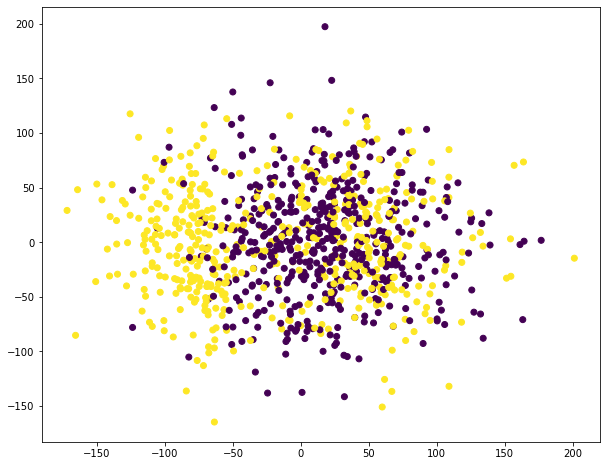

In [21]:
X_transformed = pca.transform(X)
plt.figure(figsize=(10,8))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y)

## Снизим размерность так чтобы сохранить 80 % информации

In [22]:
# вклад компонент по убыванию
pca.sorted_components

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int64)

In [23]:
# сколько нужно оставить компонент, чтобы сохранить 80% информации

information_ratio = 0
n_components = 0
for varience in pca.explained_variance_ratio:
    information_ratio += varience
    n_components += 1
    if information_ratio > 0.75:
        break
        
n_components, information_ratio

(4, 0.7719992636721631)

Сохранив 4 признака с наибольшей дисперсией мы потеряем всего 23 % информации

In [24]:
# снизим размерность до 4

pca = PCA(n_components=4)
pca.fit(X)

In [25]:
X_pca4 = pca.transform(X)
X_pca4

array([[  50.1730574 ,  -28.69803188,   35.02173217,   -6.92422181],
       [-165.83029143,  -85.23770439,  -40.05156451,  -39.19910868],
       [ 132.100832  ,    8.95978848,   25.35347789,  -20.88909683],
       ...,
       [  52.24144881,  -42.28197952,   50.83218936,  -34.98671968],
       [ -22.08437435,   52.58812101,  -33.9767396 ,    3.48403728],
       [ -64.92606453,  -24.74713733,   50.01039067,   -7.39511037]])

# KNN

## Реализация алгоритма

In [121]:
# реализацмя алгоритма KNN
from scipy.spatial import distance

class KNN:
    def __init__(self, n_neighbours, dist = distance.euclidean):
        self.n_neighbours = n_neighbours
        self.dist = dist
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X_test):
        y_pred = np.zeros(len(X_test)).astype(np.int8)
        for i in np.arange(len(X_test)):
            y_pred[i] = self.predict_data_point(X_test[i])
        return y_pred
    
    def predict_data_point(self, data_point):
        distances = np.array([self.dist(elem, data_point) for elem in self.X])
        ordered = np.argsort(distances)
        width = distances[ordered[self.n_neighbours]]
        ordered = ordered[:self.n_neighbours]
        y_k = self.y[ordered]
        W = distances[ordered] / width
        positive = (W * y_k).sum()
        negative = (W * np.logical_not(y_k)).sum()
        return int(positive > negative)

## Тест с исходными данными

In [122]:
# train - test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.15,
                                                   random_state= 42)

In [125]:
# выбор наилучших параметров
from sklearn.metrics import accuracy_score
best_params = [0,0]
best_score = 0 
for d in [distance.euclidean, distance.chebyshev, distance.cityblock]:
    for neighbours in range(1,101):
        knn = KNN(n_neighbours= neighbours, dist=d)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_score:
            best_score = accuracy
            best_params[0] = d
            best_params[1] = neighbours
        
best_params, best_score

([<function scipy.spatial.distance.chebyshev(u, v, w=None)>, 18],
 0.7241379310344828)

In [126]:
# обучение 
knn = KNN(n_neighbours= 18, dist= distance.chebyshev )
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred


array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int8)

In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        73
           1       0.78      0.62      0.69        72

    accuracy                           0.72       145
   macro avg       0.73      0.72      0.72       145
weighted avg       0.73      0.72      0.72       145



## Тест с понижением размерности

In [128]:
# train - test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca4,
                                                   y,
                                                   test_size=0.15,
                                                   random_state= 42)

In [129]:
# выбор наилучших параметров
from sklearn.metrics import accuracy_score
best_params = [0,0]
best_score = 0 
for d in [distance.euclidean, distance.chebyshev, distance.cityblock]:
    for neighbours in range(1,101):
        knn = KNN(n_neighbours= neighbours, dist=d)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_score:
            best_score = accuracy
            best_params[0] = d
            best_params[1] = neighbours
        
best_params, best_score

([<function scipy.spatial.distance.euclidean(u, v, w=None)>, 42],
 0.7103448275862069)

In [130]:
# обучение 
knn = KNN(n_neighbours= 42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int8)

In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75        73
           1       0.79      0.57      0.66        72

    accuracy                           0.71       145
   macro avg       0.73      0.71      0.70       145
weighted avg       0.73      0.71      0.70       145



# Naive Bayes

## Реализация

In [35]:
class NaiveBayes():
    # вычисление априорных вероятностей
    def calc_prior(self, features, target):
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()
        return self.prior
    
    # вычисление оценок мат ожидания и дисперсии
    def calc_statistics(self, features, target):
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()        
        return self.mean, self.var
    
    # вычисление оценки плотности вероятности с предположением нормального распределния наблюдений
    def gaussian_density(self, class_idx, x):     
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    # вычисление апостериорных вероятностей
    def calc_posterior(self, x):
        posteriors = []
        for i in range(self.count):
            prior = np.log(self.prior[i]) 
            conditional = np.sum(np.log(self.gaussian_density(i, x)))
            posterior = prior + conditional
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

## Тест с исходными данными

In [36]:
# train - test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X),
                                                   pd.Series(y),
                                                   test_size=0.15,
                                                   random_state= 42)

In [37]:
nb= NaiveBayes()
nb.fit(X_train, y_train)
y_pred = np.array(nb.predict(X_test))
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.82        73
           1       0.92      0.64      0.75        72

    accuracy                           0.79       145
   macro avg       0.82      0.79      0.79       145
weighted avg       0.82      0.79      0.79       145



## Тест с понижением размерности

In [39]:
# train - test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X_pca4),
                                                   pd.Series(y),
                                                   test_size=0.15,
                                                   random_state= 42)

In [40]:
nb= NaiveBayes()
nb.fit(X_train, y_train)
y_pred = np.array(nb.predict(X_test))
y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.88      0.73        73
           1       0.79      0.46      0.58        72

    accuracy                           0.67       145
   macro avg       0.70      0.67      0.65       145
weighted avg       0.70      0.67      0.65       145

